In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_price_regression_dataset.csv')

In [3]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('House_Price', axis=1)  # Semua kolom kecuali House_Price
y = df['House_Price']

In [4]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Membuat prediksi
y_pred = model.predict(X_test)

In [8]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nHasil Evaluasi Model:")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")


Hasil Evaluasi Model:
Root Mean Squared Error (RMSE): $10,071.48
R-squared Score: 0.9984


** Root Mean Squared Error (RMSE) = $10,071.48**

 kesalahan $10,071 terbilang cukup kecil, mengingat harga rumah biasanya dalam ratusan ribu dollar
 Semakin kecil nilai RMSE, semakin akurat model

 **R-squared Score = 0.9984**

0.9984 sangat mendekati 1, yang berarti model sangat bagus


In [9]:
# Menampilkan koefisien untuk setiap fitur
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nKoefisien untuk setiap fitur:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Koefisien untuk setiap fitur:
                Feature   Coefficient
4              Lot_Size  14885.384415
1          Num_Bedrooms  10225.204424
2         Num_Bathrooms   8208.434778
5           Garage_Size   5146.148383
3            Year_Built    993.537171
0        Square_Footage    199.513245
6  Neighborhood_Quality    115.068595


Koefisien ini menunjukkan seberapa besar pengaruh setiap fitur terhadap harga rumah. Semakin besar nilai koefisien, semakin besar pengaruhnya terhadap harga.

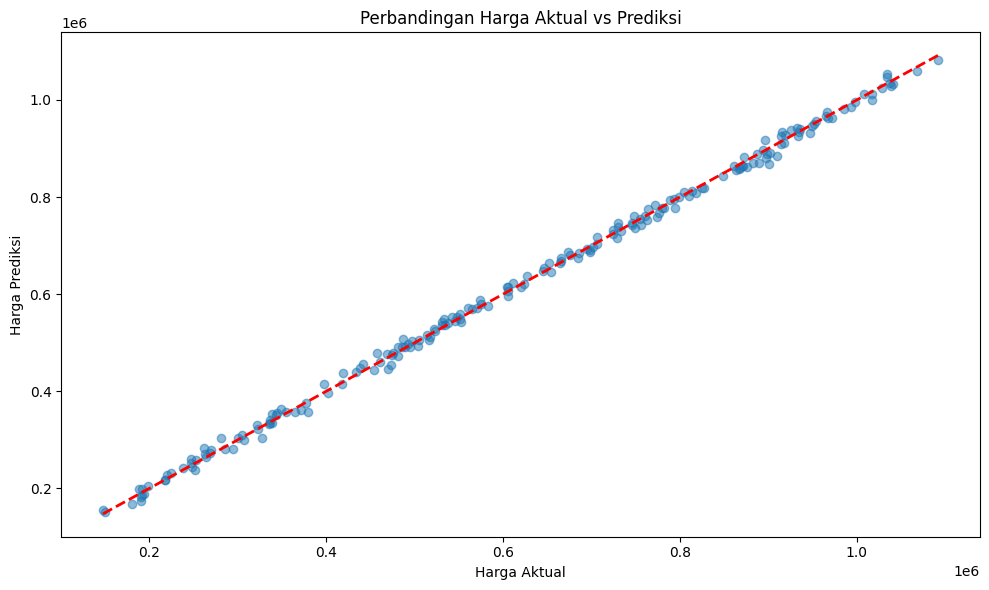

In [10]:
# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi')
plt.tight_layout()
plt.show()

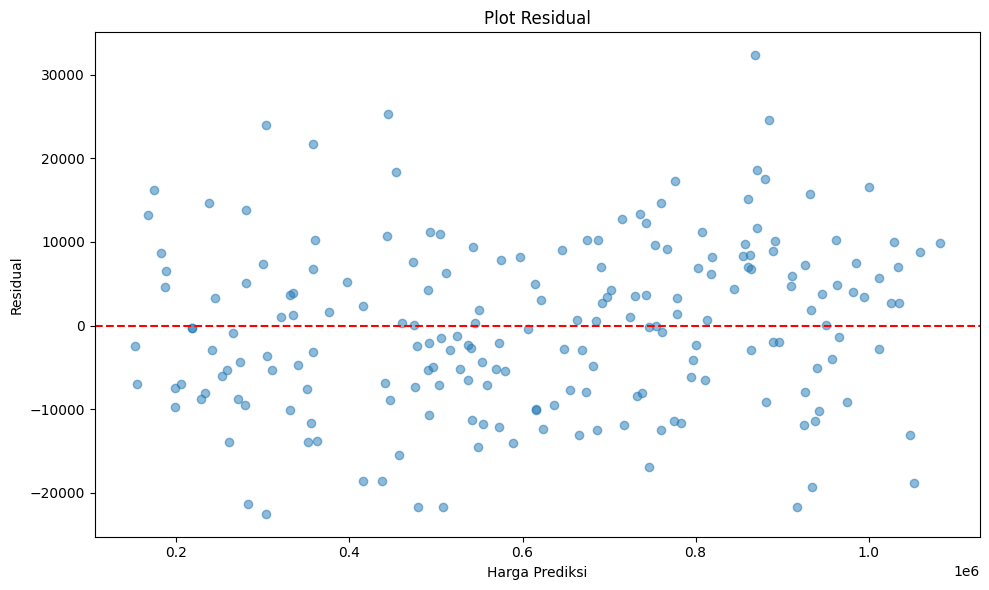

In [11]:
# Visualisasi residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Harga Prediksi')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Plot Residual')
plt.tight_layout()
plt.show()

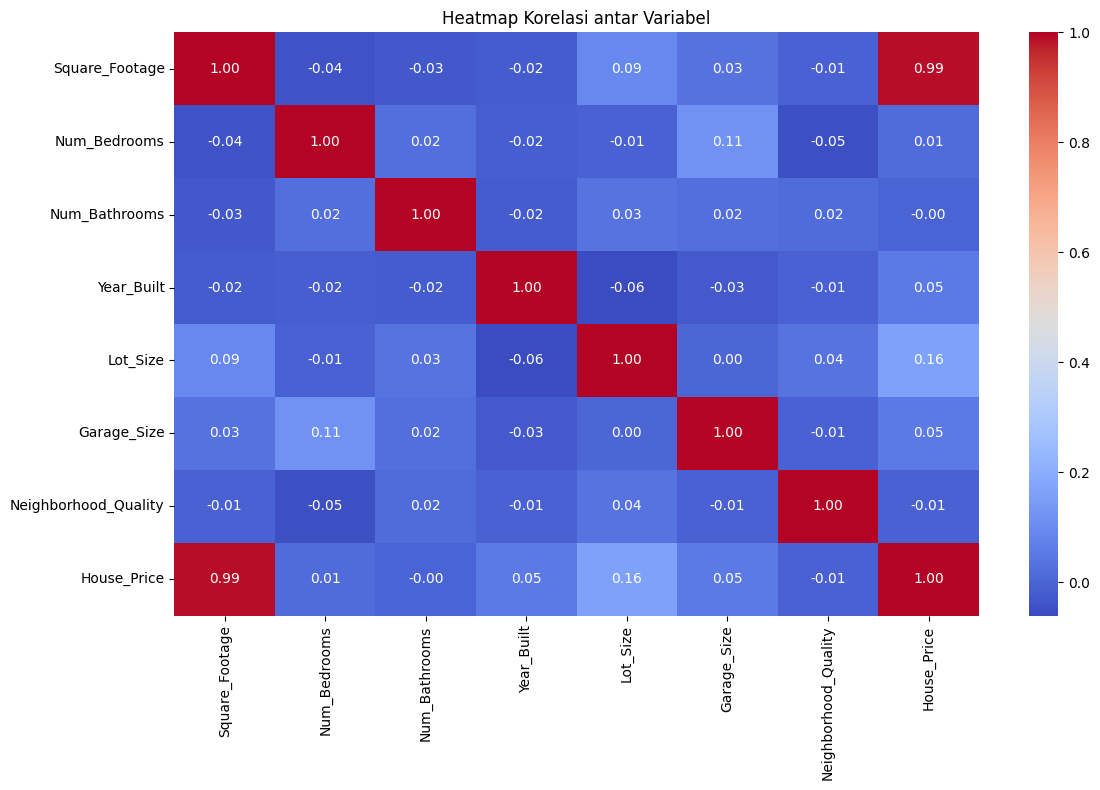

In [12]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Variabel')
plt.tight_layout()
plt.show()

In [14]:
# Fungsi untuk membuat prediksi baru
def predict_house_price(model, square_footage, bedrooms, bathrooms, year_built,
                       lot_size, garage_size, neighborhood_quality):
    """
    Fungsi untuk memprediksi harga rumah berdasarkan input karakteristik rumah
    """
    features = np.array([[square_footage, bedrooms, bathrooms, year_built,
                         lot_size, garage_size, neighborhood_quality]])
    prediction = model.predict(features)[0]
    return prediction

In [15]:
# penggunaan fungsi prediksi
contoh_rumah = predict_house_price(
    model,
    square_footage=2000,
    bedrooms=3,
    bathrooms=2,
    year_built=2000,
    lot_size=5000,
    garage_size=2,
    neighborhood_quality=8
)
print(f"\nContoh Prediksi Harga Rumah: ${contoh_rumah:,.2f}")


Contoh Prediksi Harga Rumah: $74,860,760.81


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
